<a href="https://colab.research.google.com/github/zahraDehghanian97/Neural_net_HW/blob/master/98131059_HW01/98131059_HW01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Prerequisit**

In [6]:
try:
  %tensorflow_version 2.x
except:
  pass
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from csv import reader
import random


## **load dataset**

mount google drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


load, convert and split dataset

In [12]:
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
    for row in dataset:
        row[column] = lookup[row[column]]
    return lookup

filename = "/content/drive/MyDrive/Colab Notebooks/HW01_dataset.csv"
dataset = load_csv(filename)
for i in range(len(dataset[0]) - 1):
    str_column_to_float(dataset, i)
str_column_to_int(dataset, len(dataset[0]) - 1)
np.random.shuffle(dataset)
train, validate, test = np.split(dataset, [int(.7*len(dataset)), int(.8*len(dataset))])
print(len(train),len(validate),len(test))


145 21 42


## **Pearson correlation**

In [15]:
all_best_corelation = []
def find_greater_than_3 (corr):
  temp = []
  for item in corr:
    if item[1] > 0.3 or item[1]< -0.3 :
      temp.append(item)
  return temp

compute pearson correlation on train data

In [19]:
correlations = []
for i in range(len(train[0])-1):
  corr = np.corrcoef(train[:,i],train[:,-1])
  # print("correlation between "+str(i)+"th feature and tags = "+str(corr[0,1]))
  correlations.append([i,corr[0,1]])
correlations = sorted(correlations, key=lambda t: t[1], reverse=True)
print(correlations)
all_best_corelation.append(find_greater_than_3(correlations))


[[10, 0.4422181515023248], [48, 0.3889130654820476], [11, 0.3856028900883182], [44, 0.36831913106336134], [8, 0.3529229235272831], [9, 0.352636963430212], [45, 0.3414481833814232], [47, 0.3339525960767587], [12, 0.3217677480474085], [46, 0.3159814218284191], [43, 0.29163104225790876], [20, 0.2870337894063291], [50, 0.2820173393083131], [3, 0.2742486296677549], [19, 0.2570232023327139], [0, 0.2496092916558658], [51, 0.24470823261367303], [1, 0.23363045490035225], [53, 0.23038936840531693], [21, 0.2270629423990592], [4, 0.22669559970194506], [57, 0.2230180390827884], [49, 0.2224870371056192], [7, 0.21688580048889972], [5, 0.1985571987387186], [55, 0.1950123300537619], [42, 0.18010881095735362], [2, 0.1612011225048579], [6, 0.1494837243988167], [22, 0.1493689251871386], [18, 0.14902321184688042], [58, 0.11491040785375801], [13, 0.10493821688322255], [52, 0.10399064741570228], [23, 0.10330689855396806], [54, 0.1013864689337585], [56, 0.08409133526712528], [38, 0.0672074545174766], [41, 0.0

show histogram

Text(0.5, 1.0, 'training data')

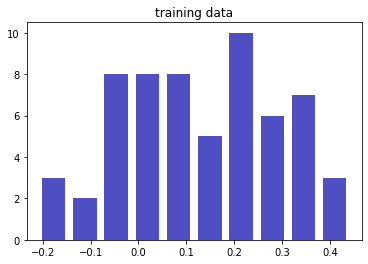

In [17]:
hist, bin_edges = np.histogram(np.array(correlations)[:,1])
# print(hist)
n, bins, patches = plt.hist(x=np.array(correlations)[:,1], bins=10, color='#0504aa',  alpha=0.7, rwidth=0.75)
plt.title("training data")

compute pearson correlation on test data

In [20]:
correlations = []
for i in range(len(test[0])-1):
  corr = np.corrcoef(test[:,i],test[:,-1])
  # print("correlation between "+str(i)+"th feature and tags = "+str(corr[0,1]))
  correlations.append([i,corr[0,1]])
correlations = sorted(correlations, key=lambda t: t[1], reverse=True)
print(correlations)
all_best_corelation.append(find_greater_than_3(correlations))

[[10, 0.4203504111336311], [9, 0.3646592942582926], [11, 0.36200603402453524], [44, 0.35246021005414924], [51, 0.33733262622641075], [50, 0.3324193299208538], [41, 0.32983917052052536], [42, 0.31834787393011627], [4, 0.31303502313185855], [8, 0.31281883807727967], [46, 0.31249974024043814], [45, 0.3114587338787451], [47, 0.31134171046976455], [43, 0.27342116761919477], [3, 0.2438907552172228], [26, 0.2384447334633234], [12, 0.2371267601427353], [0, 0.20507894049199762], [7, 0.20427499599265012], [27, 0.20370364533399254], [48, 0.2003862687620601], [25, 0.18975682685402487], [2, 0.18666080964233303], [21, 0.18146660034386816], [22, 0.16581811070658653], [40, 0.15372462799124634], [38, 0.13346496386012854], [1, 0.12918223879741184], [28, 0.12659806647958852], [20, 0.12012340702156553], [24, 0.10941244342755792], [59, 0.10677238180070227], [19, 0.10584359892656617], [23, 0.10381714391991849], [37, 0.10099245837079338], [13, 0.0970496398402423], [29, 0.07792268464169357], [52, 0.0777119652

show histogram

Text(0.5, 1.0, 'test data')

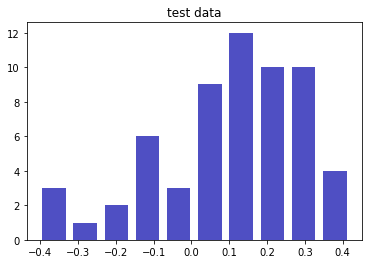

In [21]:
hist, bin_edges = np.histogram(np.array(correlations)[:,1])
# print(hist)
n, bins, patches = plt.hist(x=np.array(correlations)[:,1], bins=10, color='#0504aa',  alpha=0.7, rwidth=0.75)
plt.title("test data")

compute pearson correlation on validation data

In [22]:
correlations = []
for i in range(len(validate[0])-1):
  corr = np.corrcoef(validate[:,i],validate[:,-1])
  # print("correlation between "+str(i)+"th feature and tags = "+str(corr[0,1]))
  correlations.append([i,corr[0,1]])
correlations = sorted(correlations, key=lambda t: t[1], reverse=True)
print(correlations)
all_best_corelation.append(find_greater_than_3(correlations))

[[13, 0.5720697241006206], [14, 0.5655009664331279], [0, 0.5517600243220687], [52, 0.5359717004644835], [11, 0.5090695826709951], [1, 0.48862958384959926], [59, 0.45042574381512185], [51, 0.43912646528514065], [10, 0.43543527728625614], [12, 0.4284499804908325], [2, 0.42694908100746054], [42, 0.40600755172392], [50, 0.3958489980945185], [58, 0.39187156770347564], [48, 0.3912156363427215], [47, 0.3657148083393451], [57, 0.361339328509879], [15, 0.3562749654961697], [41, 0.35423801477478967], [53, 0.3116570655038581], [46, 0.27894024168954734], [9, 0.2716086786331185], [16, 0.24915534901531222], [19, 0.24024210937483456], [3, 0.22419193074211802], [17, 0.21717302630261826], [18, 0.21296287076015505], [20, 0.211080927371745], [54, 0.19014491172644377], [45, 0.17700059459718723], [5, 0.17121273651935628], [43, 0.1605143232912285], [8, 0.15655758548588447], [55, 0.14974188998497942], [44, 0.13865327322621016], [56, 0.134320605550188], [26, 0.13242730426104418], [49, 0.1252283035868492], [27

show histogram

Text(0.5, 1.0, 'validation data')

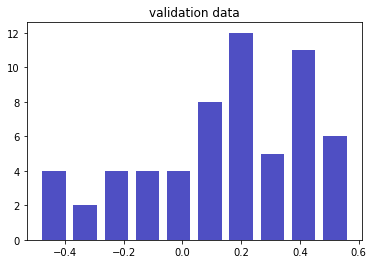

In [23]:
hist, bin_edges = np.histogram(np.array(correlations)[:,1])
# print(hist)
n, bins, patches = plt.hist(x=np.array(correlations)[:,1], bins=10, color='#0504aa',  alpha=0.7, rwidth=0.75)
plt.title("validation data")

find best feature

In [24]:
t1 = np.array(all_best_corelation[0])
t2 = np.array(all_best_corelation[1])
t3 = np.array(all_best_corelation[2])
for x in t1[:,0]:
  if x in t2[:,0] and x in t3[:,0] :
    print(x)
    temp = []
    temp.append(t1[np.where(t1[:,0]==x)[0][0]][1])
    temp.append(t2[np.where(t2[:,0]==x)[0][0]][1])
    temp.append(t3[np.where(t3[:,0]==x)[0][0]][1])
    print(temp)


10.0
[0.4422181515023248, 0.4422181515023248, 0.4422181515023248]
48.0
[0.3889130654820476, 0.3889130654820476, 0.3889130654820476]
11.0
[0.3856028900883182, 0.3856028900883182, 0.3856028900883182]
44.0
[0.36831913106336134, 0.36831913106336134, 0.36831913106336134]
8.0
[0.3529229235272831, 0.3529229235272831, 0.3529229235272831]
9.0
[0.352636963430212, 0.352636963430212, 0.352636963430212]
45.0
[0.3414481833814232, 0.3414481833814232, 0.3414481833814232]
47.0
[0.3339525960767587, 0.3339525960767587, 0.3339525960767587]
12.0
[0.3217677480474085, 0.3217677480474085, 0.3217677480474085]
46.0
[0.3159814218284191, 0.3159814218284191, 0.3159814218284191]


## **Perceptron**

In [25]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

def predict(row, weights):
    activation = weights[0]
    for i in range(len(row) - 1):
        activation += weights[i + 1] * row[i]
    return 1.0 if activation >= 0.0 else 0.0

def train_weights(train, l_rate, n_epoch):
    weights = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        for row in train:
            prediction = predict(row, weights)
            error = row[-1] - prediction
            weights[0] = weights[0] + l_rate * error
            for i in range(len(row) - 1):
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
    return weights

def perceptron(train,validate, test, l_rate, n_epoch):
    predictions = list()
    weights = train_weights(train, l_rate, n_epoch)
    for row in test:
        prediction = predict(row, weights)
        predictions.append(prediction)
    return (predictions)


l_rate = 0.01
n_epoch = 500
predicted = perceptron(train,validate, test ,l_rate,n_epoch)
actual = test[:,-1]
accuracy = accuracy_metric(actual, predicted)
print('Accuracy:' + str(accuracy) )


Accuracy:83.33333333333334
